# Анализ слов в тексте Конституции Республики Казахстан

<p align="center">
<img src="img/flag.png" width="550">
</p>

## О проекте 

Для закрепления материала курса [DataCamp](http://www.datacamp.com) о Natural Language Processing (NLP) c помощью python модуля nltk

### 1: Webscrape сайта http://www.akorda.kz 

Источник информации: раздел "Конституция" официального сайта Президента РК. 

In [2]:
# Store url
url = 'http://www.akorda.kz/en/official_documents/constitution'

запрашиваем весь html текст страницы.

In [3]:
# Import `requests`
import requests

# Make the request
r = requests.get(url)

html = r.text
#print(html)

BeautifulSoup для удобного парсинга html.

In [4]:
# Import BeautifulSoup from bs4
from bs4 import BeautifulSoup


# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")
type(soup)

bs4.BeautifulSoup

Весь текст конституции находится внутри корневого элемента div с CSS атрибутом class = "text". Это можно узнать исследовав страницу в браузере командой Inspect.

<p align="center">
    <img src="img/inspectelem.png" width="1000">
</p>

In [5]:
# Get text
text = soup.find("div",{"class":"text"}).get_text()

print(text[:400])


                                                        We, the people of Kazakhstan,
united by a common historic fate,
creating a state on the indigenous Kazakh land,
considering ourselves a peace-loving and civil society,
dedicated to the ideals of freedom, equality and concord,
wishing to take a worthy place in the world community,
realizing our high responsibility before the present and futur


всё, у нас есть весь текст конституции. Будем анализировать.

### 2: Использование NLP для получения всех слов из текста

**Note** `nltk`, the [Natural Language Toolkit](http://www.nltk.org/):

In [7]:
# Import nltk
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')

# Create tokens
tokens = tokenizer.tokenize(text)
#import nltk
#tokens = nltk.word_tokenize(text)
tokens[:8]

['We', 'the', 'people', 'of', 'Kazakhstan', 'united', 'by', 'a']

In [8]:
# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())

# Print several items from list as sanity check
print(words[:8])

print(len(words))

['we', 'the', 'people', 'of', 'kazakhstan', 'united', 'by', 'a']
16112


#### Step 2: Remove stop words

It is common practice to remove words that appear alot in the English language such as 'the', 'of' and 'a' (known as stopwords) because they're not so interesting. For more on all of these techniques, check out our [Natural Language Processing Fundamentals in Python course](https://www.datacamp.com/courses/nlp-fundamentals-in-python). 

The package `nltk` has a list of stopwords in English which you'll now store as `sw` and of which you'll print the first several elements.

If you get an error here, run the command `nltk.download('stopwords')` to install the stopwords on your system.

In [9]:
# Import nltk
import nltk

# Get English stopwords and print some of them
#sw = nltk.corpus.stopwords.words('russian')
sw = nltk.corpus.stopwords.words('english')

#sw = sw + ['см', 'п', 'г']
sw = sw + ['shall']
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

Берем только слова не являющиеся stopwords, и не цифрой. Однобуквенные тоже убираем.

In [10]:
# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw and not word.isdigit():
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:10]

['people',
 'kazakhstan',
 'united',
 'common',
 'historic',
 'fate',
 'creating',
 'state',
 'indigenous',
 'kazakh']

## 3. Строим график топ 25 слов

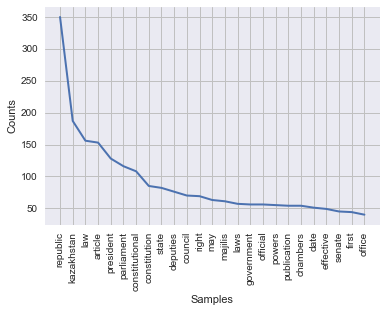

In [12]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)